## MINIPROJECT : 1  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors

In [2]:
df=pd.read_csv('Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


## ~~~ DATA PREPROCESSING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [5]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [6]:
df.drop('ID',axis=1,inplace=True)                                    #FEATURE SELECTION

### ~~~~~ EDA

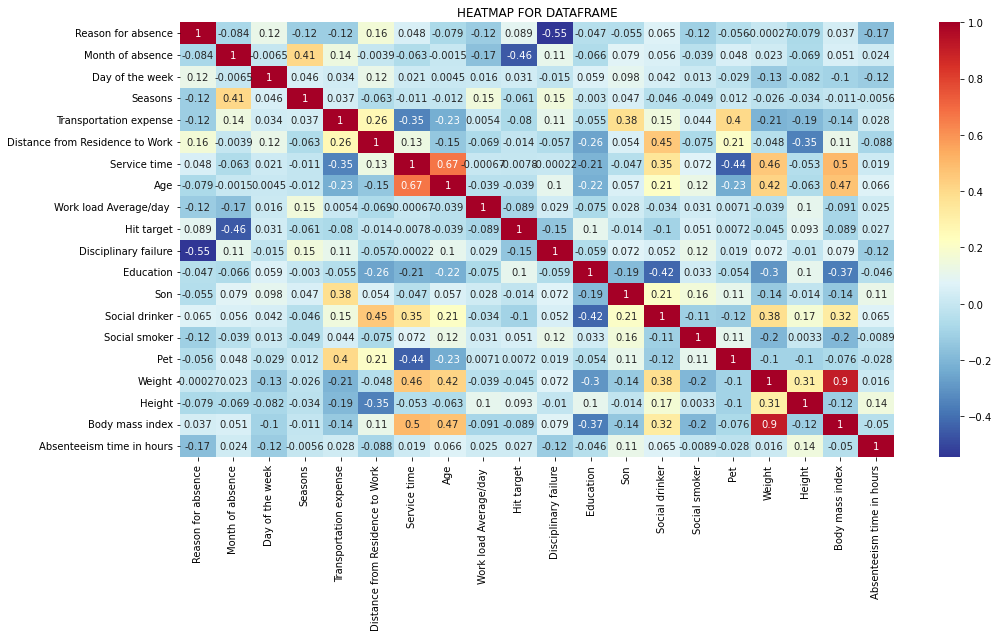

In [7]:
fig=plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu_r');
plt.title('HEATMAP FOR DATAFRAME');

In [8]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

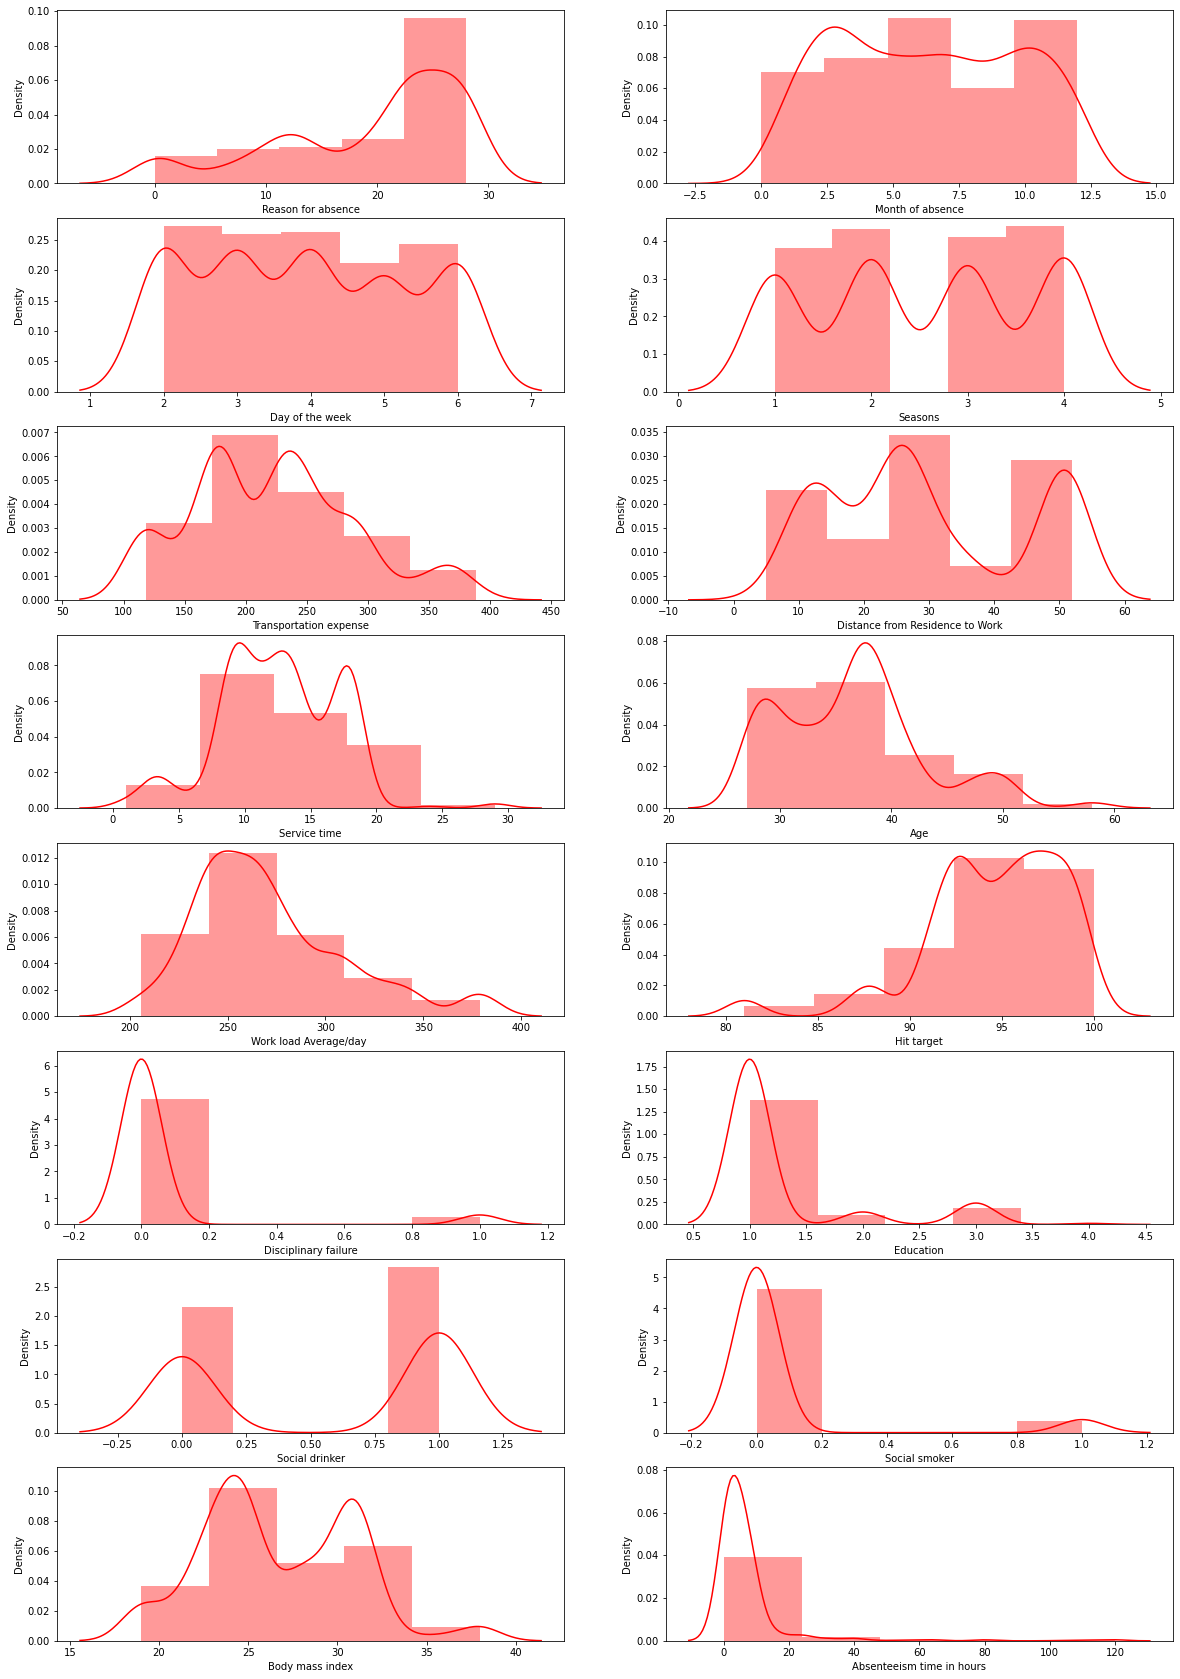

In [9]:
col=['Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Transportation expense', 
     'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Disciplinary failure',
     'Education', 'Social drinker','Social smoker', 'Body mass index','Absenteeism time in hours']
fig,ax=plt.subplots(8,2,figsize=(20,30))
for i,j in zip(col,ax.flatten()):
    sns.distplot(df[i],ax=j,bins=5,color='r')


##### INTERPRETATION: DISTRIBUTION OF EVERY COLUMN WITH BIN RANGE 6.

In [10]:
df['Disciplinary failure'].value_counts()

0    700
1     40
Name: Disciplinary failure, dtype: int64

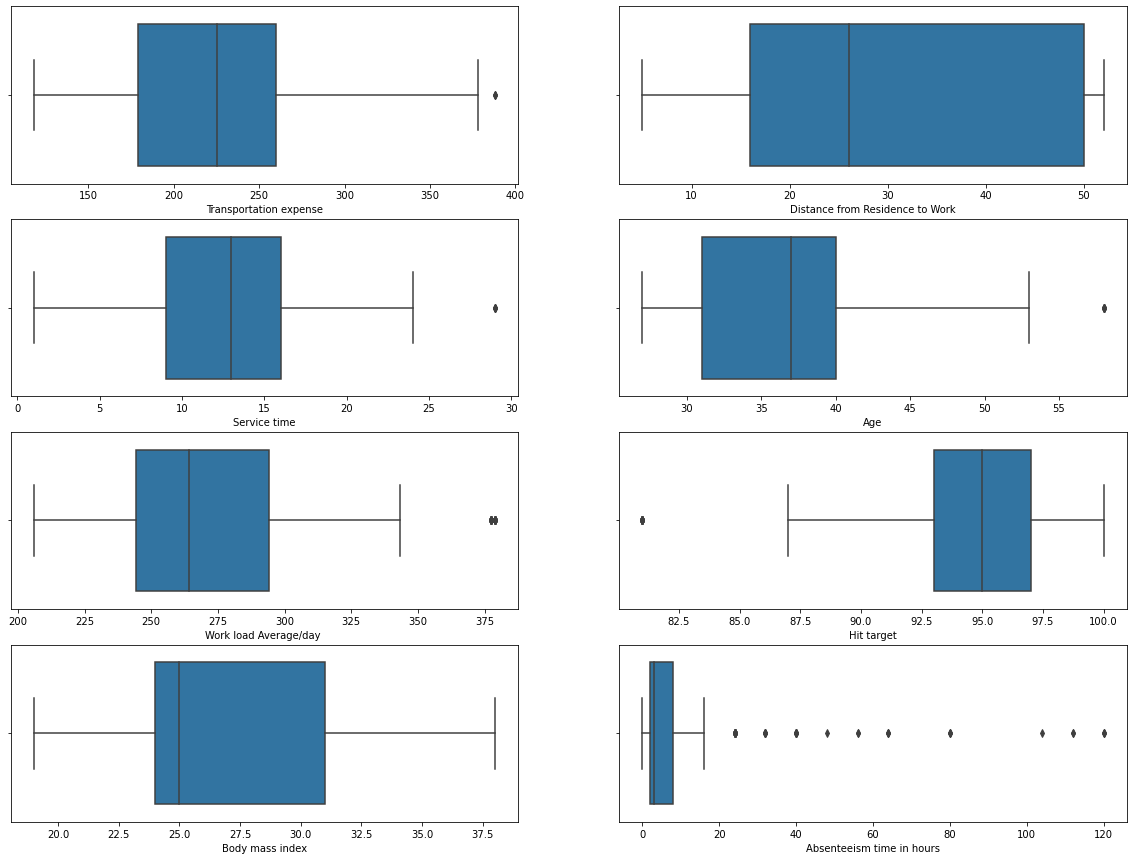

In [11]:
col=['Transportation expense', 
     'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target','Body mass index','Absenteeism time in hours']
fig,ax=plt.subplots(4,2,figsize=(20,15))
for i,j in zip(col,ax.flatten()):
    sns.boxplot(df[i],ax=j)


##### INTERPRETATION: DISTRIBUTION OF EVERY COLUMN USING BOX PLOT.

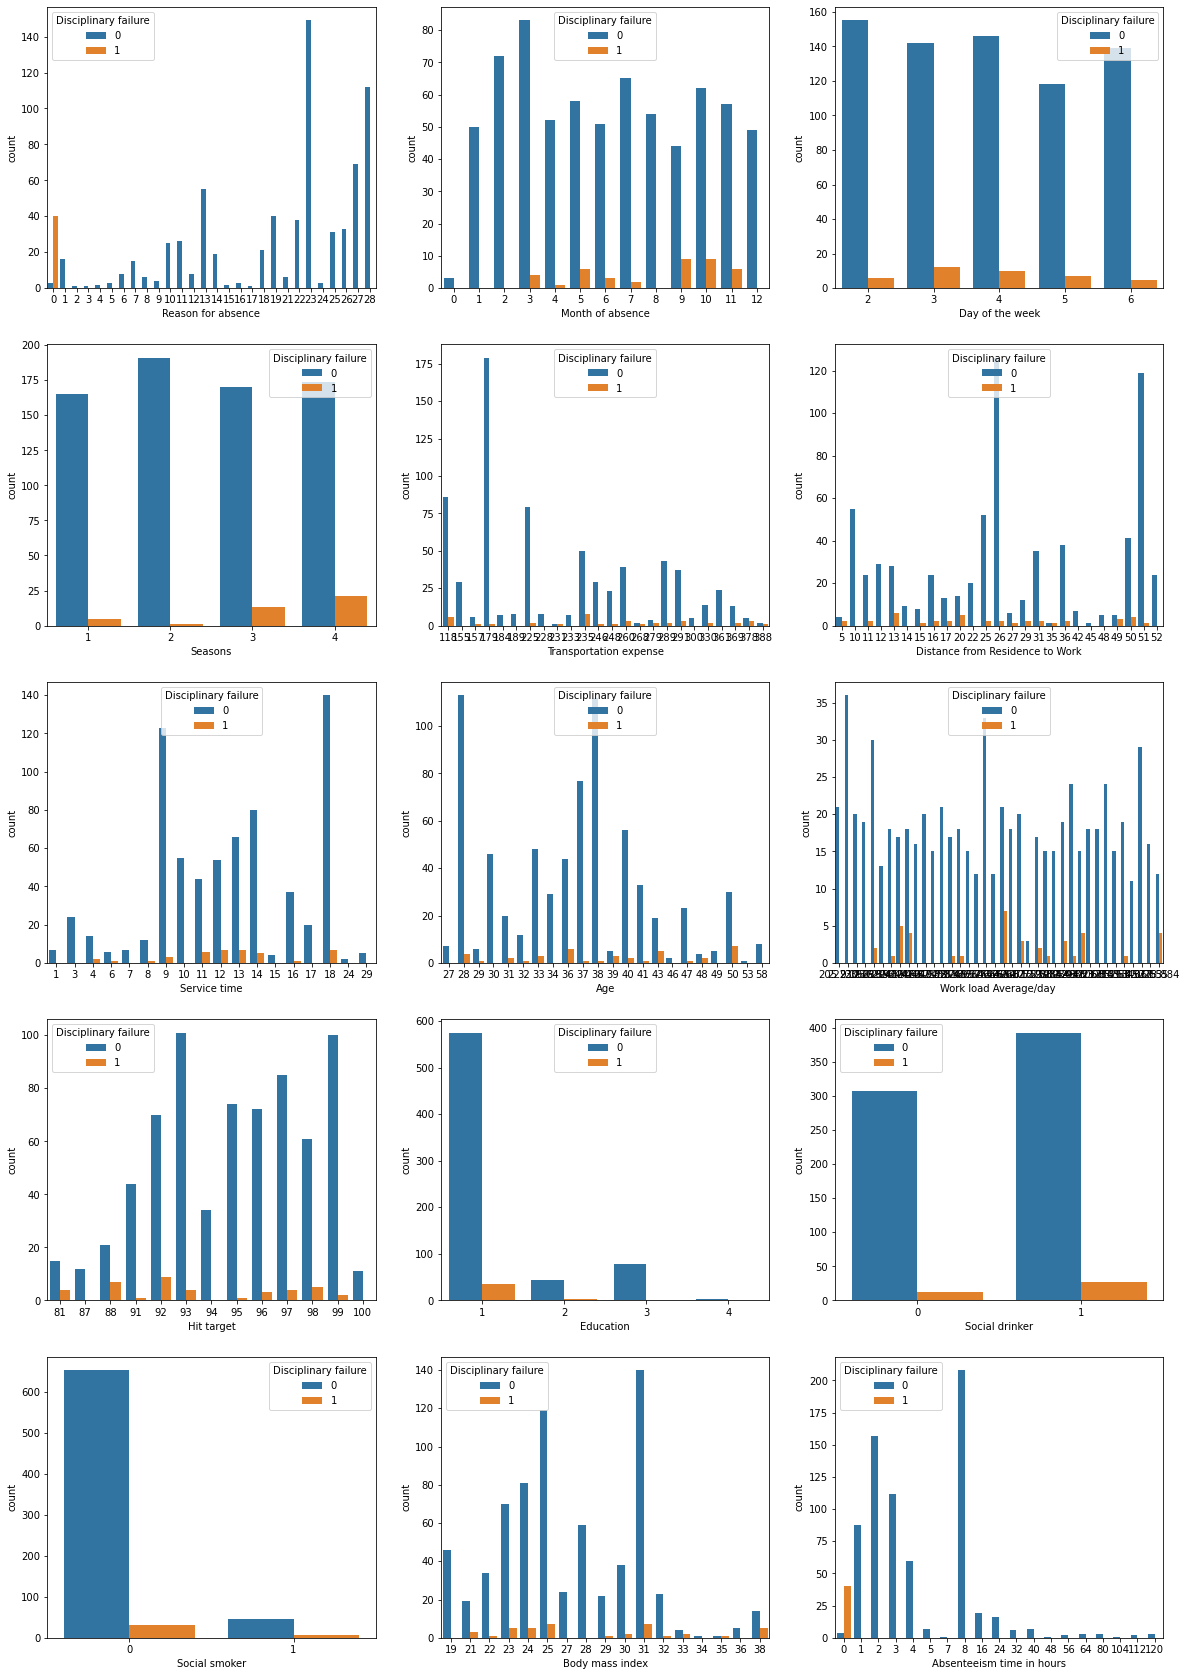

In [12]:
col=['Reason for absence', 'Month of absence', 'Day of the week','Seasons', 'Transportation expense', 
     'Distance from Residence to Work','Service time', 'Age', 'Work load Average/day ', 'Hit target',
     'Education', 'Social drinker','Social smoker', 'Body mass index','Absenteeism time in hours']
fig,ax=plt.subplots(5,3,figsize=(20,30))
for i,j in zip(col,ax.flatten()):
    sns.countplot(df[i],hue=df['Disciplinary failure'],ax=j)


##### INTERPRETATION: COUNTPLOT FOR EACH COLUMN WITH RESPECT TO DISCIPLANORY FAILURE.HERE WE CAN SEE MOST OF THE COUNT IS NO FOR DISCIPLANORY FAILURE.

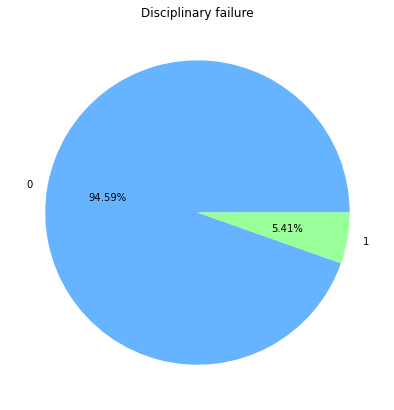

In [13]:
fig=plt.figure(figsize=(12,7))
plt.pie(df['Disciplinary failure'].value_counts(),labels=df['Disciplinary failure'].value_counts().keys(),colors=['#66b3ff','#99ff99'],autopct='%0.2f%%');
plt.title('Disciplinary failure');

##### INTERPRETATION: HERE WE CAN SEE THAT 94% OF DATA HAS PROPORTION AS NO(0) FOR DISCIPLANORY FAILURE.

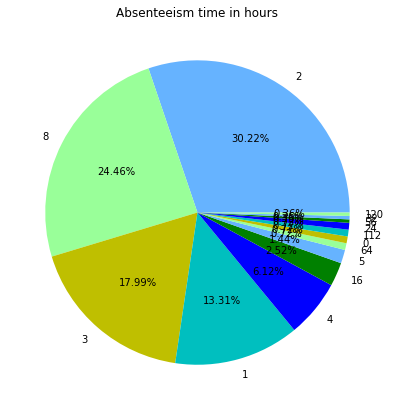

In [14]:
fig=plt.figure(figsize=(12,7))
df3=df[(df['Disciplinary failure']==0)& (df['Social drinker']==0)& (df['Social smoker']==0)]
plt.pie(df3['Absenteeism time in hours'].value_counts(),labels=df3['Absenteeism time in hours'].value_counts().keys(),colors=['#66b3ff','#99ff99','y','c','b','g'],autopct='%0.2f%%');
plt.title('Absenteeism time in hours');

##### INTERPRETATION: FOR DISCIPLANORY FAILURE,SOCIAL DRINKER & SOCIAL SMOKER AS NO (0) ,PROPORTION FOR ABSENTEEISM TIME IS MAXIMUM FOR 2 HOURS.

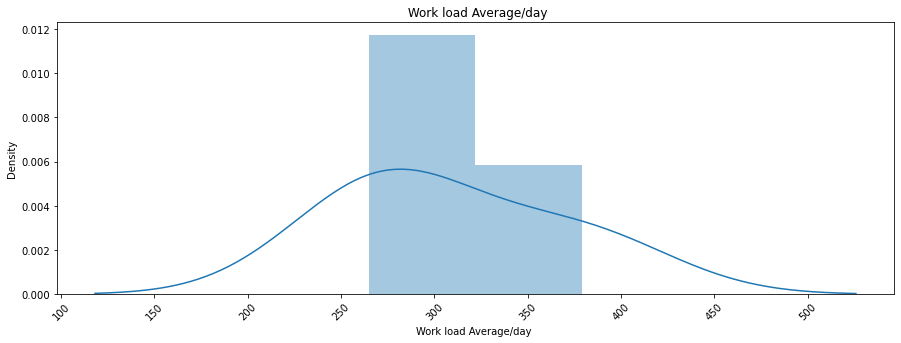

In [15]:
fig=plt.figure(figsize=(15,5))
df3=df[(df['Disciplinary failure']==1)& (df['Social drinker']==1)& (df['Social smoker']==1)]
sns.distplot(df3['Work load Average/day ']);
plt.title(' Work load Average/day');
plt.xticks(rotation=45);

##### INTERPRETATION: FOR DISCIPLANORY FAILURE,SOCIAL DRINKER & SOCIAL SMOKER AS YES (1) ,DISTRIBUTION FOR WORKLOAD AVERAGE/DAY RANGES BETWEEN 280-380.

In [16]:
df['Transportation expense'].min(),df['Transportation expense'].max()

(118, 388)

In [17]:
df['Age'].min(),df['Age'].max()

(27, 58)

In [18]:
df['Body mass index'].min(),df['Body mass index'].max()

(19, 38)

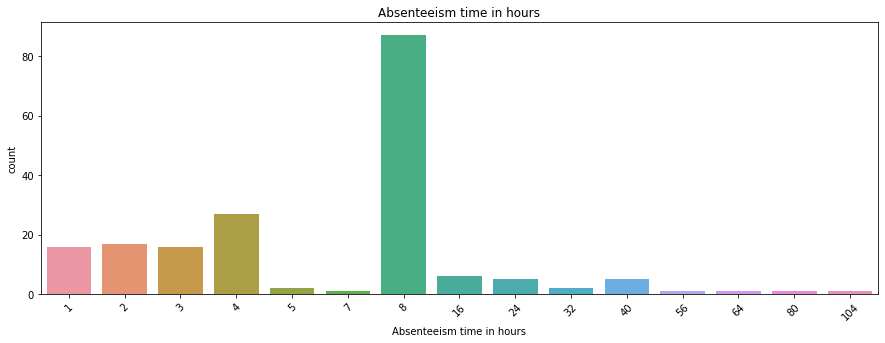

In [19]:
fig=plt.figure(figsize=(15,5))
df3=df[(df['Disciplinary failure']==0) &(df['Transportation expense']>250)]
sns.countplot(df3['Absenteeism time in hours']);
plt.title('Absenteeism time in hours');
plt.xticks(rotation=45);

##### INTERPRETATION: FOR DISCIPLANORY FAILURE AS NO AND TRANSPORTATION EXPENSE AS GREATER THAN 250 ,COUNT FOR ABSENTEEISM IS MAXIMUM WITH 8 HOURS.

In [20]:
MinMax=MinMaxScaler()                                                      #FEATURE TRANSFORMATION
df_scaled=pd.DataFrame(MinMax.fit_transform(df),columns=df.columns)
df_scaled.head(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.583333,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.583333,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000


### -- PCA

In [21]:
pca=PCA(n_components=7)                                                     #FEATURE EXTRACTION
pca_f=pca.fit_transform(df_scaled)
pca_r=pca.explained_variance_ratio_
print("EXPLAINED VARIANCE RATIO IS : ",pca_r)
print('SUM OF EXPLAINED VARIANCE RATIO FOR N_COMPONENTS:',sum(pca_r))

EXPLAINED VARIANCE RATIO IS :  [0.22278234 0.12283927 0.11196617 0.08787678 0.07675786 0.05691415
 0.05380936]
SUM OF EXPLAINED VARIANCE RATIO FOR N_COMPONENTS: 0.7329459365570831


## WITHOUT PCA

## ---- K MEANS CLUSTERING ----

In [22]:
WCSS=[]
for i in range(2,20,2):
    k=KMeans(n_clusters=i)
    k.fit(df_scaled)
    WCSS.append(k.inertia_)

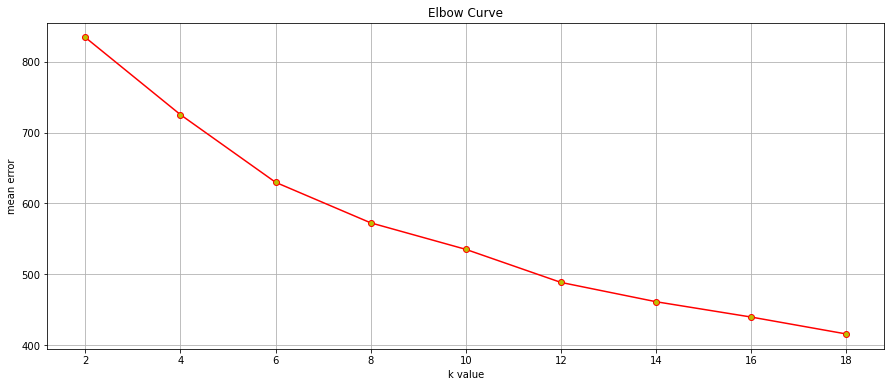

In [23]:
fig=plt.figure(figsize=(15,6))
plt.plot(range(2,20,2),WCSS,color='r',markerfacecolor='y',marker='o')
plt.xlabel('k value')
plt.ylabel('mean error')
plt.grid(True)
plt.title('Elbow Curve');

In [24]:
k=KMeans(n_clusters=4)
y_predict=k.fit_predict(df_scaled)
cluster_centroid=k.cluster_centers_

In [25]:
labels=k.labels_

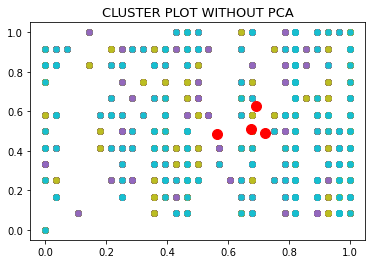

In [26]:
for i in list(y_predict):
    plt.scatter(df_scaled.values[y_predict==i,0],df_scaled.values[y_predict==i,1],s=30)
plt.scatter(cluster_centroid[:,0],cluster_centroid[:,1],s=100,c='r')
plt.title("CLUSTER PLOT WITHOUT PCA",fontsize=13);

In [27]:
K_Wo_PCA = silhouette_score(df_scaled,k.labels_)
K_Wo_PCA

0.18134946330150242

## ======= AGGLOMERATIVE CLUSTERING =======

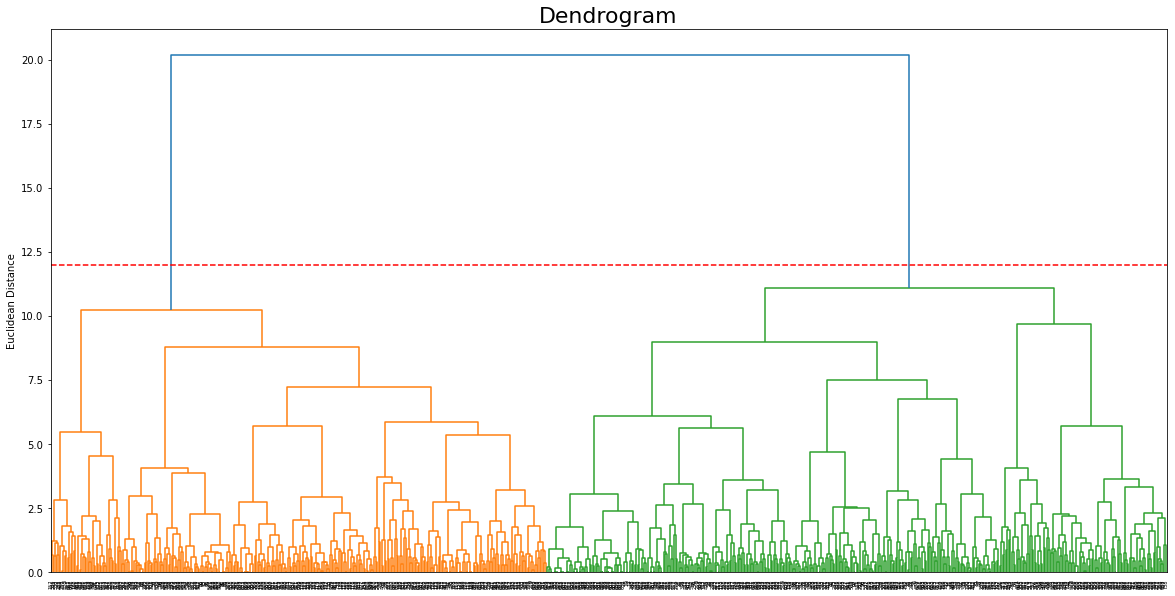

In [28]:
fig=plt.figure(figsize=(20,10))
dend=sch.dendrogram(sch.linkage(df_scaled,method='ward'))
plt.axhline(y=12,color='r',linestyle='--')
plt.title("Dendrogram",fontsize=22)
plt.ylabel("Euclidean Distance");

In [29]:
agglo=AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')
agg_f=agglo.fit_predict(df_scaled)
agg_f

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [30]:
df_scaled[agg_f==0].shape,df_scaled[agg_f==1].shape

((411, 20), (329, 20))

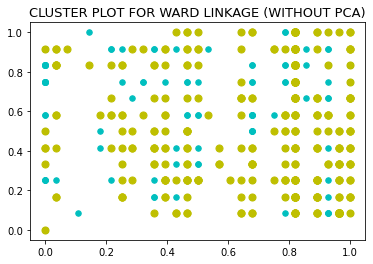

In [31]:
plt.scatter(df_scaled.values[agg_f==0,0],df_scaled.values[agg_f==0,1],s=30,c='c')
plt.scatter(df_scaled.values[agg_f==1,0],df_scaled.values[agg_f==1,1],s=50,c='y')
plt.title("CLUSTER PLOT FOR WARD LINKAGE (WITHOUT PCA)",fontsize=13);

In [32]:
agg_wo_pca=silhouette_score(df_scaled,agglo.labels_)
agg_wo_pca

0.19795516707635724

## ===== DBSCAN =====

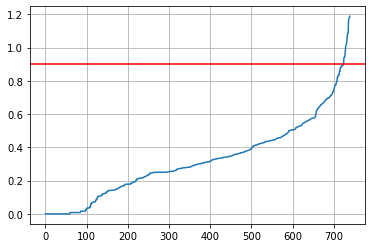

In [33]:
nn=NearestNeighbors(n_neighbors=4)
nn_f=nn.fit(df_scaled)
distance,indices=nn_f.kneighbors(df_scaled)
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.grid(True)
plt.axhline(y=0.9,color='r');

In [34]:
epsilon=0.9
for i in range(2,20,2):
    db=DBSCAN(min_samples=i,eps=epsilon)
    db_f=db.fit_predict(df_scaled)
    x=db_f+2
    y=np.bincount(x)
    nz=np.nonzero(y)[0]
    result=list(zip(y,nz))
    print( 'Min Samples==> ',i,'| Obtained Clustering==> ',result)

Min Samples==>  2 | Obtained Clustering==>  [(0, 1), (16, 2), (363, 3), (16, 4), (5, 5), (268, 6), (6, 7), (4, 8), (2, 9), (6, 10), (20, 11), (2, 12), (4, 13), (2, 14), (2, 15), (3, 16), (2, 17), (2, 18), (3, 19), (4, 20), (6, 21), (2, 22)]
Min Samples==>  4 | Obtained Clustering==>  [(0, 1), (40, 2), (363, 3), (5, 4), (267, 5), (5, 6), (4, 7), (16, 8), (20, 9), (4, 10), (6, 11), (4, 12)]
Min Samples==>  6 | Obtained Clustering==>  [(0, 1), (68, 2), (363, 3), (267, 4), (16, 5), (20, 6)]
Min Samples==>  8 | Obtained Clustering==>  [(0, 1), (83, 2), (363, 3), (266, 4), (20, 5)]
Min Samples==>  10 | Obtained Clustering==>  [(0, 1), (92, 2), (362, 3), (266, 4)]
Min Samples==>  12 | Obtained Clustering==>  [(0, 1), (95, 2), (360, 3), (265, 4)]
Min Samples==>  14 | Obtained Clustering==>  [(0, 1), (99, 2), (359, 3), (264, 4)]
Min Samples==>  16 | Obtained Clustering==>  [(0, 1), (110, 2), (353, 3), (261, 4)]
Min Samples==>  18 | Obtained Clustering==>  [(0, 1), (133, 2), (350, 3)]


In [35]:
db=DBSCAN(min_samples=8,eps=0.9)
db_f=db.fit(df_scaled)
df_scaled['DBSCAN LABELS']=db.labels_

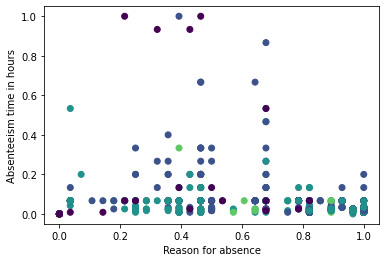

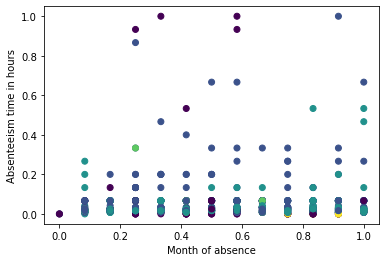

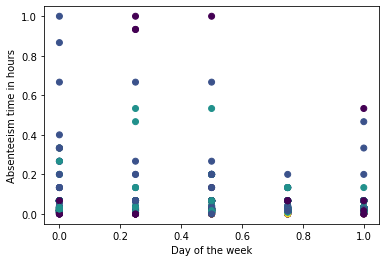

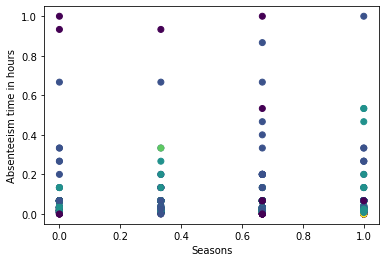

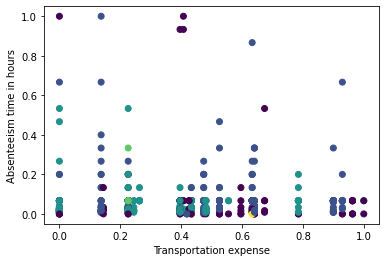

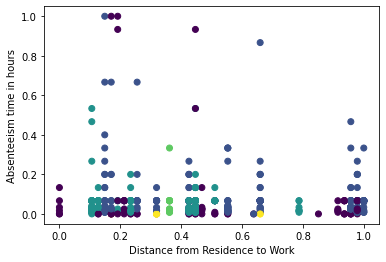

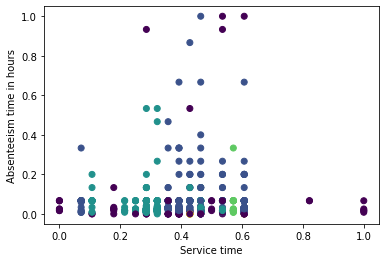

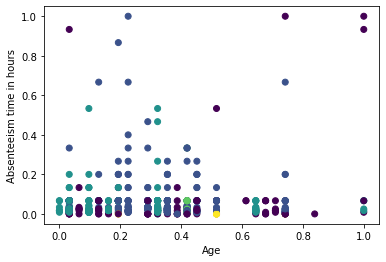

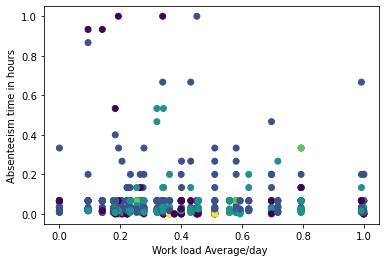

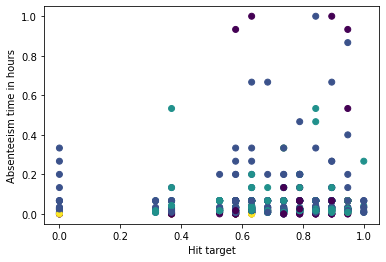

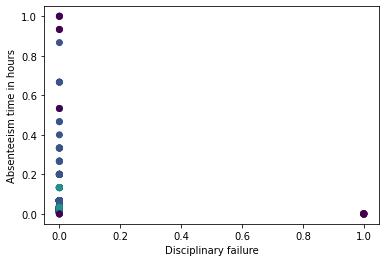

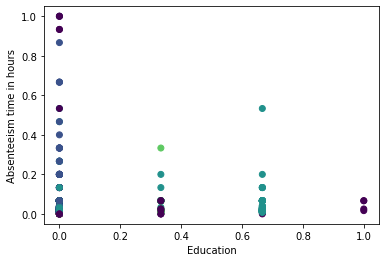

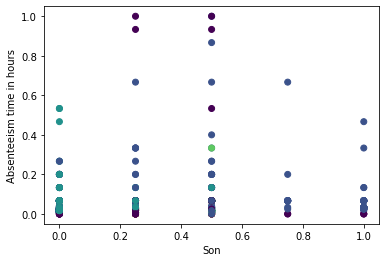

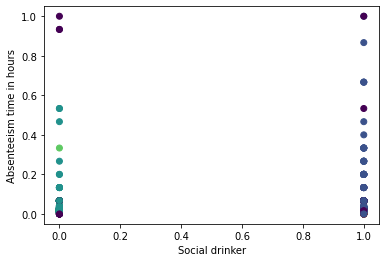

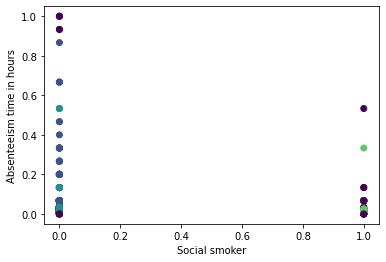

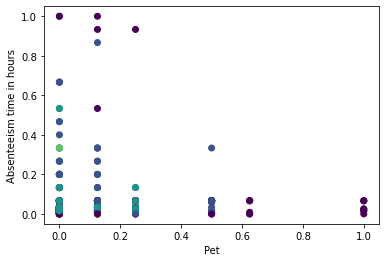

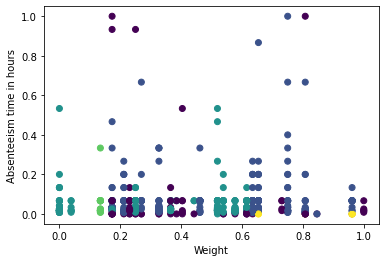

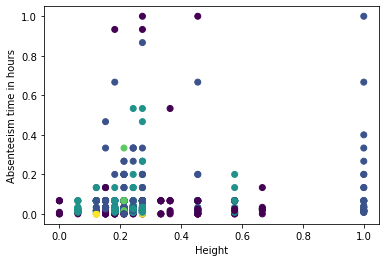

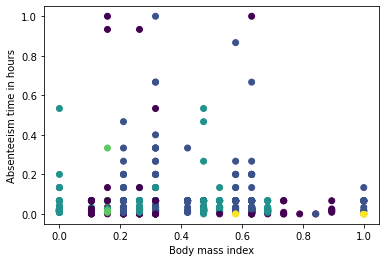

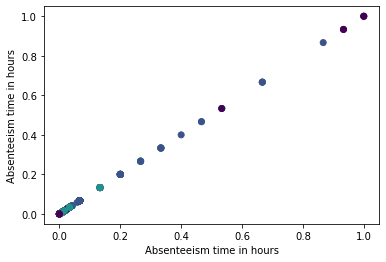

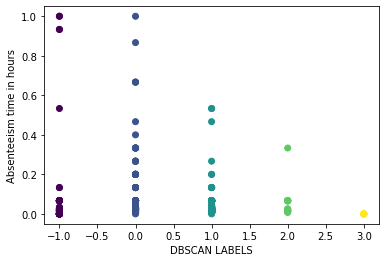

In [36]:
for i in df_scaled.columns:
    plt.scatter(df_scaled[i],df_scaled['Absenteeism time in hours'],c=df_scaled['DBSCAN LABELS'])
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.show()

In [37]:
DB_Wo_PCA = silhouette_score(df_scaled,db.labels_)
DB_Wo_PCA

0.30914039639312163

## =========== WITH PCA =============

### ~~~ KMEANS

In [38]:
wcss=[]
for i in range(2,20,2):
    k=KMeans(n_clusters=i)
    k.fit(pca_f)
    wcss.append(k.inertia_)

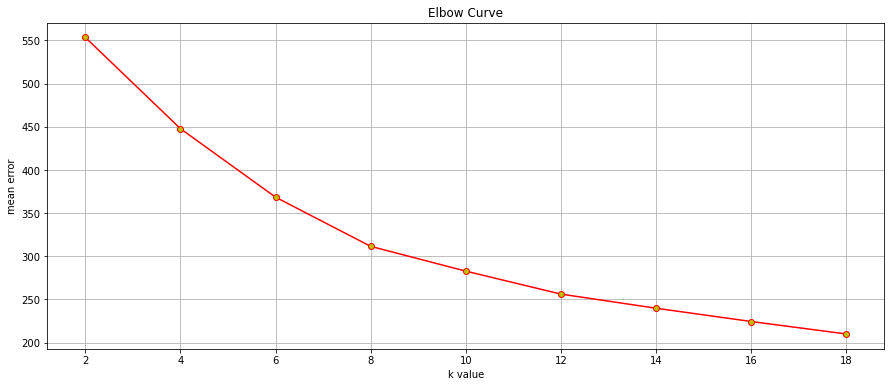

In [39]:
fig=plt.figure(figsize=(15,6))
plt.plot(range(2,20,2),wcss,color='r',markerfacecolor='y',marker='o')
plt.xlabel('k value')
plt.ylabel('mean error')
plt.grid(True)
plt.title('Elbow Curve');

In [40]:
k=KMeans(n_clusters=8)
y_predict1=k.fit_predict(pca_f)
cluster_centroid=k.cluster_centers_

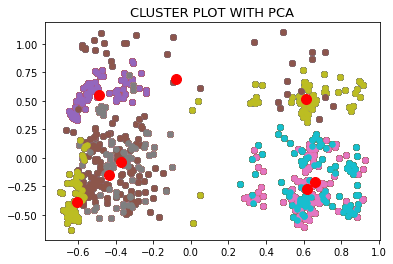

In [41]:
for h in list(y_predict1):
    plt.scatter(pca_f[y_predict1==h,0],pca_f[y_predict1==h,1],s=30)
plt.scatter(cluster_centroid[:,0],cluster_centroid[:,1],s=100,c='r')
plt.title("CLUSTER PLOT WITH PCA",fontsize=13);

In [42]:
K_W_PCA = silhouette_score(pca_f,k.labels_)
K_W_PCA

0.2276704563820824

### ~~ AGGLOMERATIVE 

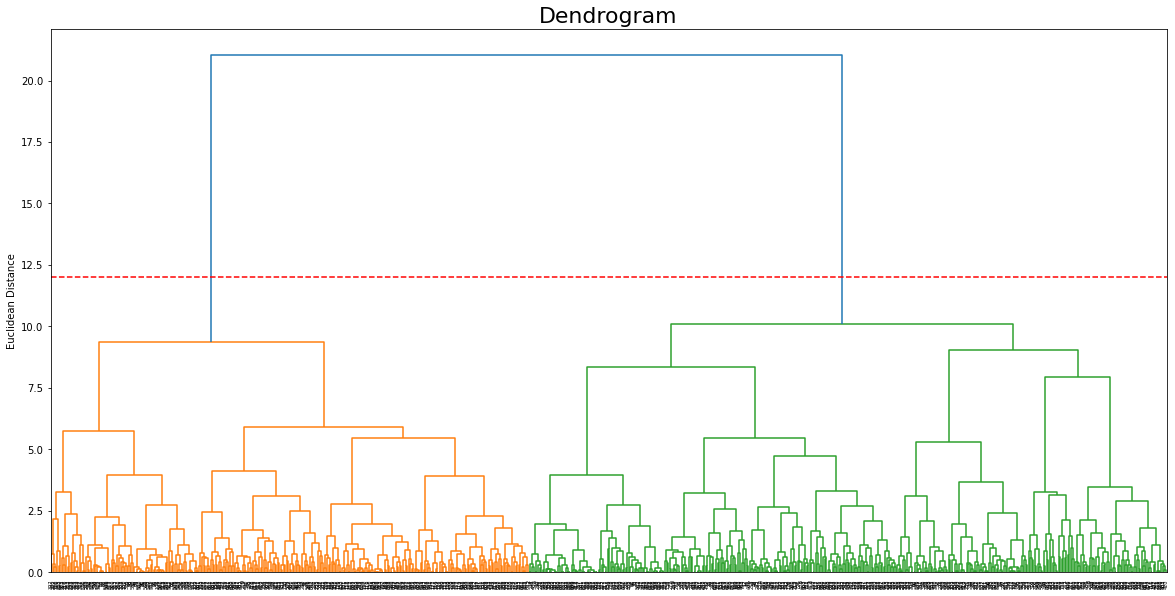

In [43]:
fig=plt.figure(figsize=(20,10))
dend=sch.dendrogram(sch.linkage(pca_f,method='ward'))
plt.axhline(y=12,color='r',linestyle='--')
plt.title("Dendrogram",fontsize=22)
plt.ylabel("Euclidean Distance");

In [44]:
agglo=AgglomerativeClustering(n_clusters=2,linkage='ward',affinity='euclidean')
agg_f=agglo.fit_predict(pca_f)
agg_f

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [45]:
pca_f[agg_f==0].shape,pca_f[agg_f==1].shape

((423, 7), (317, 7))

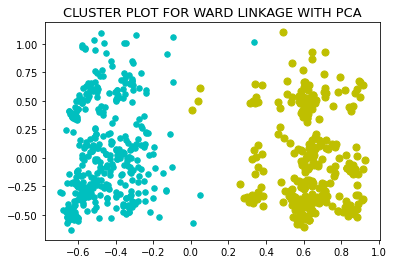

In [46]:
plt.scatter(pca_f[agg_f==0,0],pca_f[agg_f==0,1],s=30,c='c')
plt.scatter(pca_f[agg_f==1,0],pca_f[agg_f==1,1],s=50,c='y')
plt.title("CLUSTER PLOT FOR WARD LINKAGE WITH PCA",fontsize=13);

In [47]:
agg_w_pca=silhouette_score(pca_f,agglo.labels_)
agg_w_pca

0.2786378862849553

### ~DBSCAN

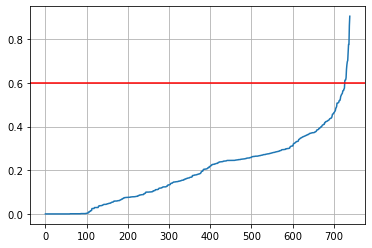

In [48]:
nn=NearestNeighbors(n_neighbors=4)
nn_f=nn.fit(pca_f)
distance,indices=nn_f.kneighbors(pca_f)
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.grid(True)
plt.axhline(y=0.6,color='r');

In [49]:
epsilon=0.6
for i in range(2,20,2):
    db=DBSCAN(min_samples=i,eps=epsilon)
    db_f=db.fit_predict(pca_f)
    x=db_f+2
    y=np.bincount(x)
    nz=np.nonzero(y)[0]
    result=list(zip(y,nz))
    print( 'Min Samples==> ',i,'| Obtained Clustering==> ',result)

Min Samples==>  2 | Obtained Clustering==>  [(0, 1), (13, 2), (392, 3), (303, 4), (9, 5), (9, 6), (3, 7), (4, 8), (2, 9), (2, 10)]
Min Samples==>  4 | Obtained Clustering==>  [(0, 1), (24, 2), (392, 3), (303, 4), (9, 5), (8, 6)]
Min Samples==>  6 | Obtained Clustering==>  [(0, 1), (39, 2), (386, 3), (299, 4), (9, 5)]
Min Samples==>  8 | Obtained Clustering==>  [(0, 1), (55, 2), (381, 3), (295, 4)]
Min Samples==>  10 | Obtained Clustering==>  [(0, 1), (74, 2), (371, 3)]
Min Samples==>  12 | Obtained Clustering==>  [(0, 1), (90, 2), (340, 3), (289, 4)]
Min Samples==>  14 | Obtained Clustering==>  [(0, 1), (107, 2), (327, 3), (288, 4)]
Min Samples==>  16 | Obtained Clustering==>  [(0, 1), (132, 2), (324, 3)]
Min Samples==>  18 | Obtained Clustering==>  [(0, 1), (139, 2), (271, 3), (284, 4)]


In [50]:
db=DBSCAN(min_samples=8,eps=0.6)
db_f=db.fit(pca_f)
df_scaled['DBSCAN LABELS 2']=db.labels_

Text(0.5, 1.0, 'CLUSTERS FOR DBSCAN WITH PCA')

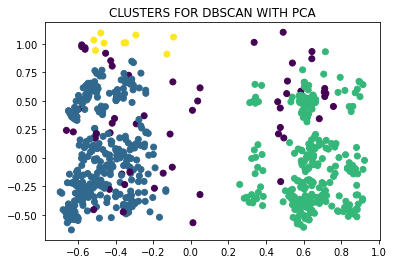

In [51]:
plt.scatter(pca_f[:,0],pca_f[:,1],c=df_scaled['DBSCAN LABELS 2']);
plt.title("CLUSTERS FOR DBSCAN WITH PCA")

In [52]:
DB_W_PCA = silhouette_score(pca_f,db.labels_)
DB_W_PCA

0.2462209445702615

## ~ FINAL TABLE ~

In [53]:
DATA=pd.DataFrame({'SILHOUTTE SCORE ':['WITHOUT PCA','WITH PCA'],"K-MEANS":[K_Wo_PCA,K_W_PCA],"AGGLOERATIVE":[agg_wo_pca,agg_w_pca],"DBSCAN ":[DB_Wo_PCA,DB_W_PCA]})
DATA

,SILHOUTTE SCORE,K-MEANS,AGGLOERATIVE,DBSCAN
0,WITHOUT PCA,0.181349,0.197955,0.309140
1,WITH PCA,0.227670,0.278638,0.246221


## INTERPRETATION: 
- BY COMPARING SILHOUETTE SCORE FOR EACH CLUSTERING TECHNIQUE WE CAN CONCLUDE THAT AGGLOMERATIVE CLUSTERING IS SHOWING THE BEST RESULT AS IT HAS THE HIGHEST SILHOUETTE SCORE AFTER PCA.
- ALSO DBSCAN IS PERFORMING POOR AFTER PCA AS IT IS SHOWING BEST SILHOUETTE SCORE WITHOUT PCA i.e., 30%.    